<h1>Assignment - 3</h1>
<p>Name: Gaurav Navada<br>
Reg.no.: 20BKT0128<br>
Gmail: gaurav.navada2020@vitstudent.ac.in</p>

<h3><b>Task - Build a CNN model to classify bird species</b></h3>

In [1]:
#import necassary libraries
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization, Dropout
import tensorflow as tf

In [ ]:
#Checking number of images for each species in test and train dataset
import os
path = '/kaggle/input/bird-species-classification'
test_file = path + '/test_data/test_data'
train_file = path + '/train_data/train_data'
def ListNumberOfFiles(file1, temp1):
  s = 0
  print(f"For {temp1}: ")
  for i in os.listdir(file1):
    temp = len(os.listdir(file1 + '/' + i))
    s += temp
    print(i, temp)
  print(f"Total number of {temp1}:", s)
ListNumberOfFiles(test_file, "Test Data")
print()
ListNumberOfFiles(train_file, "Train Data")

For Test Data: 
brhkyt 6
cbrtsh 7
himgri 20
indvul 9
hsparo 9
blasti 15
cmnmyn 8
wcrsrt 10
lbicrw 6
jglowl 6
bonegl 7
himbul 19
gretit 7
hilpig 10
mgprob 7
rebimg 11
Total number of Test Data: 157

For Train Data: 
brhkyt 5
cbrtsh 7
himgri 20
indvul 9
hsparo 9
blasti 15
cmnmyn 7
wcrsrt 10
lbicrw 6
jglowl 6
bonegl 6
himbul 18
gretit 6
hilpig 10
mgprob 6
rebimg 10
Total number of Train Data: 150


In [ ]:
#Rescaling and Data Augmentation
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)
     

train = train_gen.flow_from_directory(train_file,
                                      target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=10)
test = test_gen.flow_from_directory(test_file,
                                    target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=10)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
#Classes of Species and thier corresponding numerical value
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
#Dictionary predict class will help us to predict final class from numerical value
predict_class = {}
temp = train.class_indices
for i in temp:
  predict_class[temp[i]] = i
predict_class

{0: 'blasti',
 1: 'bonegl',
 2: 'brhkyt',
 3: 'cbrtsh',
 4: 'cmnmyn',
 5: 'gretit',
 6: 'hilpig',
 7: 'himbul',
 8: 'himgri',
 9: 'hsparo',
 10: 'indvul',
 11: 'jglowl',
 12: 'lbicrw',
 13: 'mgprob',
 14: 'rebimg',
 15: 'wcrsrt'}

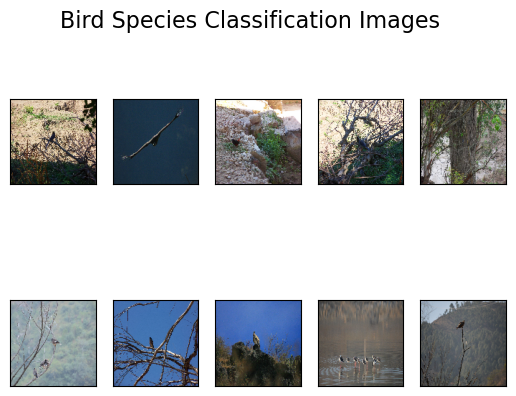

In [ ]:
#Generating images in batches
batch = train.next()
#Taking the numpy array values of images - size (10, 200, 200, 3) 
image = batch[0]

#For plotting the image
f = plt.figure(1)
f.suptitle("Bird Species Classification Images", fontsize=16)

#Iterating through batch of size 10
for i in range(10):
  f.add_subplot(2, 5, i+1)
  plt.tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
  img = image[i, :, :, :]
  plt.imshow(img)
# Displaying the figure
f.show()

In [ ]:
#Building CNN Model
model = Sequential()
model.add(Convolution2D(32,(5,5),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
#Summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 116, 116, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 56, 56, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                      

In [ ]:
#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model - Fitting the data to the model
history = model.fit(train,
          batch_size=10,
          validation_data=test,
          epochs=30)

Epoch 1/30
15/15 [==============================] - 54s 4s/step - loss: 5.1848 - accuracy: 0.1200 - val_loss: 2.7920 - val_accuracy: 0.0255
Epoch 2/30
15/15 [==============================] - 50s 3s/step - loss: 2.7687 - accuracy: 0.2467 - val_loss: 2.8804 - val_accuracy: 0.0318
Epoch 3/30
15/15 [==============================] - 49s 3s/step - loss: 2.5677 - accuracy: 0.2667 - val_loss: 2.8648 - val_accuracy: 0.1720
Epoch 4/30
15/15 [==============================] - 63s 4s/step - loss: 2.2332 - accuracy: 0.3133 - val_loss: 3.2101 - val_accuracy: 0.2166
Epoch 5/30
15/15 [==============================] - 51s 4s/step - loss: 2.1923 - accuracy: 0.3467 - val_loss: 3.5172 - val_accuracy: 0.0828
Epoch 6/30
15/15 [==============================] - 51s 3s/step - loss: 2.1930 - accuracy: 0.3800 - val_loss: 4.0844 - val_accuracy: 0.1210
Epoch 7/30
15/15 [==============================] - 50s 3s/step - loss: 1.9990 - accuracy: 0.4200 - val_loss: 4.4832 - val_accuracy: 0.0955
Epoch 8/30
15/15 [==

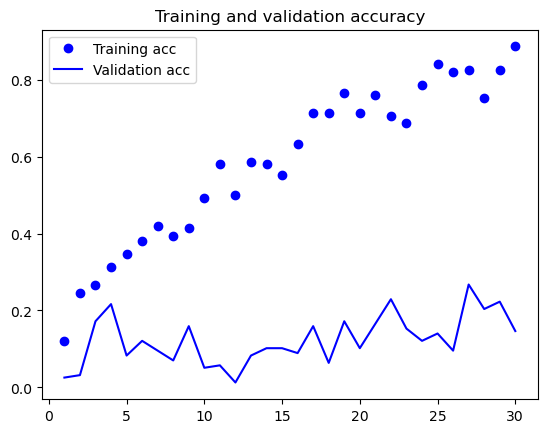

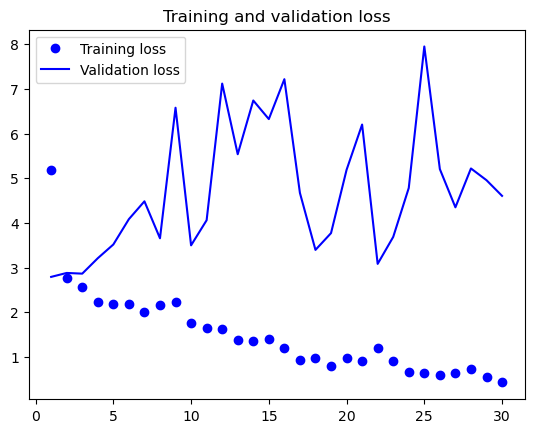

In [ ]:
#Visualizing the Training and testing accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Saving model
model.save('birdSpeciesClassificationCNN.h5')

In [ ]:
#Load model - This step is done so that we do not have to train the model and get results again.
from keras.models import load_model
model = load_model('birdSpeciesClassificationCNN.h5')

In [ ]:
#Testing
from tensorflow.keras.preprocessing import image
test_image1 = "/kaggle/input/bird-species-classification/test_data/test_data/cmnmyn/DSC_7625.jpg"
test_image2 = '/kaggle/input/bird-species-classification/test_data/test_data/brhkyt/D72_0477.jpg'
test_image3 = '/kaggle/input/bird-species-classification/test_data/test_data/indvul/DSC_1277.jpg'

In [ ]:
# Testing 1 - right answer: cmnmyn
img = image.load_img(test_image1,target_size=(120,120))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
pred = np.argmax(model.predict(img))
print(f"Numerical prediction (0-15): {pred}")
print(f"Prediction of Class: {predict_class[pred]}")

1/1 [==============================] - 0s 32ms/step
Numerical prediction (0-15): 4
Prediction of Class: cmnmyn


In [ ]:
#Testing 2- right answer: brhkyt
img = image.load_img(test_image2,target_size=(120,120))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
pred = np.argmax(model.predict(img))
print(f"Numerical prediction (0-15): {pred}")
print(f"Prediction of Class: {predict_class[pred]}")

1/1 [==============================] - 0s 28ms/step
Numerical prediction (0-15): 4
Prediction of Class: cmnmyn


In [ ]:
#Testing 3 - right answer: indvul
img = image.load_img(test_image3,target_size=(120,120))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
pred = np.argmax(model.predict(img))
print(f"Numerical prediction (0-15): {pred}")
print(f"Prediction of Class: {predict_class[pred]}")

1/1 [==============================] - 0s 28ms/step
Numerical prediction (0-15): 4
Prediction of Class: cmnmyn
